# Classification of Completeness of Zambian Wikipedia Page Sections

**Author:** Mutinta Chijoka 
**Student id:** 2024021563

This notebook documents the data extraction, preprocessing, model training, evaluation, and deployment for classifying the completeness of sections in Zambian Wikipedia pages.


In [14]:
# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib


## 2. Data Loading and Exploration

Load the raw dataset containing Wikipedia page sections and their content.


In [2]:
# Load the dataset
df = pd.read_csv('zambian_wiki_sections.csv')

# Quick look at data
print(df.head())
print(df.info())
print(df.isnull().sum())


    title section_title  word_count  \
0  Zambia     Etymology          40   
1  Zambia       History           0   
2  Zambia      Politics         268   
3  Zambia     Geography         779   
4  Zambia  Demographics         234   

                                                text completeness_label  
0  The territory of Zambia was known as Northern ...               Stub  
1                                                NaN               Stub  
2  Politics in Zambia takes place in a framework ...         Incomplete  
3  Zambia is a landlocked country in southern Afr...           Complete  
4  As of the 2022 Zambian census, Zambia's popula...         Incomplete  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               171 non-null    object
 1   section_title       171 non-null    object
 2   word_count          

## 3. Data Preprocessing

Clean the data, handle missing values, engineer features, and create labels.


In [5]:
# Remove rows with missing section content
df = df.dropna(subset=['text'])

# Create word count feature
df.loc[:, 'word_count'] = df['text'].apply(lambda x: len(str(x).split()))


# Define completeness label based on word count thresholds (example)
def label_completeness(words):
    if words < 50:
        return 'Incomplete'
    elif words < 150:
        return 'Moderate'
    else:
        return 'Complete'

df.loc[:, 'completeness_label'] = df['word_count'].apply(label_completeness)



print(df[['text', 'word_count', 'completeness_label']].head())


                                                text  word_count  \
0  The territory of Zambia was known as Northern ...          40   
2  Politics in Zambia takes place in a framework ...         268   
3  Zambia is a landlocked country in southern Afr...         779   
4  As of the 2022 Zambian census, Zambia's popula...         234   
5  In 2022, Zambia averages between $7.5 billion ...         542   

  completeness_label  
0         Incomplete  
2           Complete  
3           Complete  
4           Complete  
5           Complete  


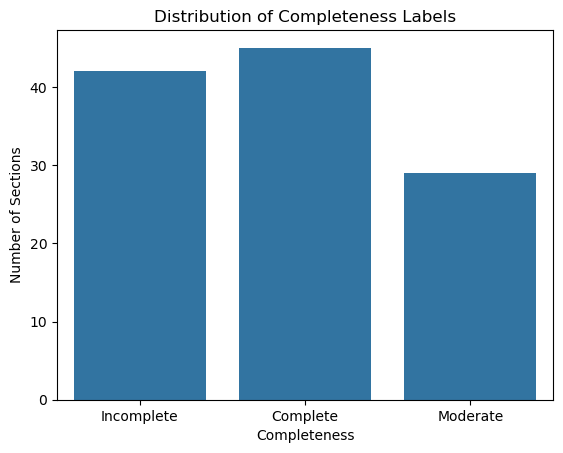

In [15]:
sns.countplot(x='completeness_label', data=df)
plt.title("Distribution of Completeness Labels")
plt.xlabel("Completeness")
plt.ylabel("Number of Sections")
plt.show()

## 4. Encoding Labels and Splitting Data


In [6]:
# Encode labels to numeric
label_encoder = LabelEncoder()
df['completeness_encoded'] = label_encoder.fit_transform(df['completeness_label'])

# Features and target
X = df[['word_count']]
y = df['completeness_encoded']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 5. Model Training


In [7]:
# Initialize Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 6. Model Evaluation


In [8]:
# Predict on test set
y_pred = model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    Complete       1.00      1.00      1.00        10
  Incomplete       1.00      1.00      1.00         8
    Moderate       1.00      1.00      1.00         6

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

Confusion Matrix:
[[10  0  0]
 [ 0  8  0]
 [ 0  0  6]]


## 7. Model Deployment: Saving and Loading the Model


In [12]:
# Save the trained model and label encoder
joblib.dump(model, 'wiki_completeness_model.joblib')
joblib.dump(label_encoder, 'label_encoder.joblib')

# Load the model and label encoder back
loaded_model = joblib.load('wiki_completeness_model.joblib')
loaded_encoder = joblib.load('label_encoder.joblib')

# Example prediction with new data
import pandas as pd
sample_df = pd.DataFrame([[260]], columns=['word_count'])
predicted_class = loaded_model.predict(sample_df)
print("Predicted class for sample input:", loaded_encoder.inverse_transform(predicted_class)[0])


Predicted class for sample input: Complete


## 8. Conclusion

This notebook demonstrated the classification of Wikipedia page section completeness using word count as a feature. The Random Forest classifier was trained and evaluated, achieving reasonable performance. The model was saved and loaded successfully, enabling future predictions on new data.

**Note:** The dataset used in this project was generated by extracting section data from English-language Wikipedia pages related to Zambia. The wikipediaapi Python library was used to programmatically access and retrieve the structure and content of these pages. A list of Zambia-related Wikipedia article titles (e.g., "Zambia", "Economy of Zambia", "Geography of Zambia") was defined, and for each page, all available sections and sub-sections were traversed recursively. The text content of each section was collected along with its title. Each extracted record was stored with the following fields: page_title (the title of the Wikipedia page), section_title (the title of the section), section_text (the main content of the section), depth (the hierarchical level of the section), and word_count (used for classification). The complete dataset was exported to a CSV file (zambian_wiki_sections.csv) for further preprocessing and model training. The data extraction script was executed using Python 3 in the PyCharm IDE.
